In [81]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [82]:
# load image
img = cv.imread('ArtGallery.jpg')
spare_image = img.copy()

In [83]:
#define 4 source and destination points
srcP = np.array([[27,113], 
                       [197,159], 
                       [26,445], 
                       [195,368]])

dstP = np.array([[377,177], 
                       [584,177], 
                       [376,341], 
                       [584, 340]])

#find H  Matrix
H, _ = cv.findHomography(srcP, dstP)
print(H)

[[-3.95898382e-02 -2.15817709e-02  3.57566706e+02]
 [-4.80924756e-01  4.45568995e-01  1.28864982e+02]
 [-2.02086987e-03 -5.56448388e-05  1.00000000e+00]]


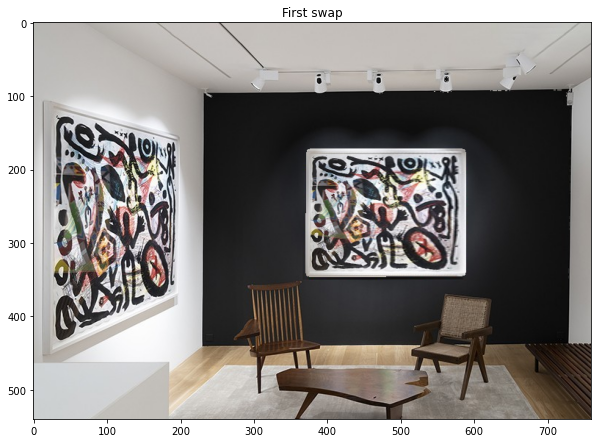

In [86]:
dstP2 = np.array([[376,341], 
                       [377,177], 
                       [584, 340], 
                       [584,177]])

# transform image using homography
persp_transform = cv.warpPerspective(spare_image, H ,(spare_image.shape[1], spare_image.shape[0]))

# Draws a filled convex polygon with black color
spare_image = cv.polylines(spare_image, [dstP], True, 0, 10)
spare_image = cv.fillPoly(spare_image, [dstP], 0)

spare_image = cv.polylines(spare_image, [dstP2], True, 0, 10)
spare_image = cv.fillPoly(spare_image, [dstP2], 0)

#dense multi-dimensional meshgrid
He, Wi = np.mgrid[:spare_image.shape[0], :spare_image.shape[1]]

# Filters out coordinates which color value equals to zeros (black region)
wi = Wi[spare_image[..., 2] == 0]
he = He[spare_image[..., 2] == 0]

# Fills black region with color
for i in range(len(wi)):
    spare_image[he[i], wi[i]] = persp_transform[he[i], wi[i]]

del persp_transform

plt.figure(figsize=(10, 8))
plt.title("First swap")
plt.imshow(cv.cvtColor(spare_image, cv.COLOR_BGR2RGB))
plt.show()


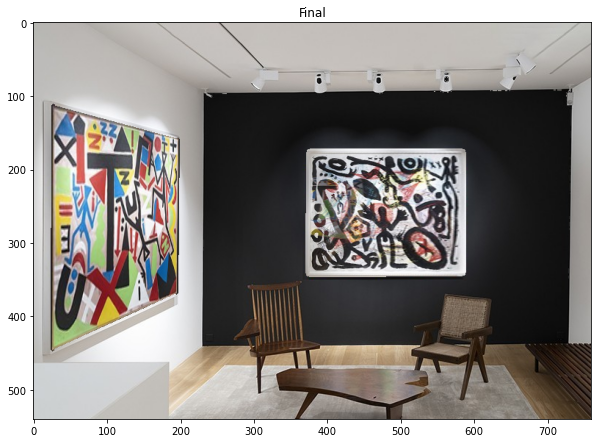

In [88]:
#Second part
srcP2 = np.array([[26,445], 
                       [27,113], 
                       [195,368], 
                       [197,159]])

persp_transform = cv.warpPerspective(img, np.linalg.inv(H),
                        (img.shape[1], img.shape[0]))

# Draws a filled convex polygon with black color
dst_image = cv.polylines(spare_image, [srcP], True, 3)
dst_image = cv.fillPoly(spare_image, [srcP], 0)

dst_image = cv.polylines(spare_image, [srcP2], True, 0, 3)
dst_image = cv.fillPoly(spare_image, [srcP2], 0)

# Fills the black region with region which we want to swap
#dense multi-dimensional meshgrid
He, Wi = np.mgrid[:spare_image.shape[0], :spare_image.shape[1]]

# Filters out coordinates which color value equals to zero
wi = Wi[dst_image[..., 2] == 0]
he = He[dst_image[..., 2] == 0]

# Fills black region with color
for i in range(len(wi)):
    dst_image[he[i], wi[i]] = persp_transform[he[i], wi[i]]


fig = plt.figure(figsize=(10, 8))
plt.title("Final")
plt.imshow(cv.cvtColor(dst_image, cv.COLOR_BGR2RGB))
plt.show()
fig.savefig("F10915104.jpeg")